# Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

## Visualizing the data

In [2]:
!cat data/ex2data1.txt | head -5

34.62365962451697,78.0246928153624,0
30.28671076822607,43.89499752400101,0
35.84740876993872,72.90219802708364,0
60.18259938620976,86.30855209546826,1
79.0327360507101,75.3443764369103,1


In [3]:
data = np.loadtxt('data/ex2data1.txt', delimiter=',')
X = data[:, :-1]
y = data[:, -1:]

not_admitted_index = np.where(y.ravel()==0)
admitted_index = np.where(y.ravel()==1)

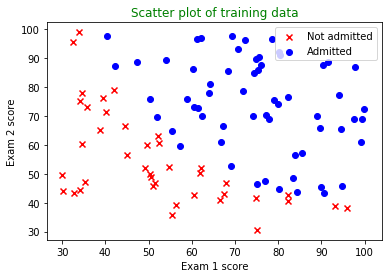

In [4]:
plt.scatter(X[not_admitted_index, 0], X[not_admitted_index, 1], marker='x', color='r', label = 'Not admitted')
plt.scatter(X[admitted_index, 0], X[admitted_index, 1], marker='o', color='b', label = 'Admitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.title('Scatter plot of training data', color='g')
plt.legend(loc = 'upper right')
plt.show()

## Cost function and gradient

<img src="data/img/cost.png" align="left"><img src="data/img/derivative.png" width="60%" align="left">

In [5]:
def sigmoid(z):
    return 1. / (1 + np.exp(-z))

def h(theta, X):
    return sigmoid(np.dot(X, theta))

def computCost(X, y, theta):
    m = X.shape[0]
    h_y = h(theta, X) - y
    cost = -1./m * np.sum(np.dot(y.T, np.log(h(theta, X))) + np.dot((1-y).T, np.log(1-h(theta, X))))
    grad = 1./m * np.dot(X.T, h_y)
    return cost, grad

In [6]:
# test the grad
X = np.insert(X, 0, 1, axis=1)
m = X.shape[1]
theta = np.zeros([m, 1])

cost, grad = computCost(X, y, theta)
print('compute with theta=[0,0,0]')
print('Expected cost (approx): 0.693...')
print('Computed cost: %f' % cost)
print('Expected gradients (approx): [-0.1,-12,-11]')
print('Computed gradients: ', grad)

cost, grad = computCost(X, y, np.array([[-24],[0.2],[0.2]]))
print('\n\ncompute with theta=[-24,0.2,0.2]')
print('Expected cost (approx):0.218....')
print('Computed cost: %f' % cost)
print('Expected gradients (approx): [0.04,2.566,0.646]')
print('Computed gradients: ', grad)

compute with theta=[0,0,0]
Expected cost (approx): 0.693...
Computed cost: 0.693147
Expected gradients (approx): [-0.1,-12,-11]
Computed gradients:  [[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]


compute with theta=[-24,0.2,0.2]
Expected cost (approx):0.218....
Computed cost: 0.218330
Expected gradients (approx): [0.04,2.566,0.646]
Computed gradients:  [[ 0.04290299]
 [ 2.56623412]
 [ 2.64679737]]


In [7]:
# 最优算法
# https://www.programcreek.com/python/example/66756/scipy.optimize.fmin_cg
from scipy import optimize

initial_theta = np.zeros([X.shape[1], 1]).ravel()
args = (X,y)

def costFunction(theta, *args):
    X, y = args
    m = X.shape[0]
    h_y = h(theta, X) - y
    cost = -1./m * np.sum(np.dot(y.T, np.log(h(theta, X))) + np.dot((1-y).T, np.log(1-h(theta, X))))
    return cost

def costFunctionGradient(theta, *args):
    X, y = args
    theta = theta.reshape(-1,1)
    m = X.shape[0]
    h_y = h(theta, X) - y
    grad = 1./m * np.dot(X.T, h_y)
    g = grad.ravel()
    return g

optimize_theta = optimize.fmin_cg(costFunction, x0=initial_theta, fprime=costFunctionGradient, args=args, maxiter=50)
print(optimize_theta)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 45
         Function evaluations: 106
         Gradient evaluations: 106
[-25.1613555    0.20623165   0.20147203]


/Users/mvpzhao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


## Evaluating logistic regression

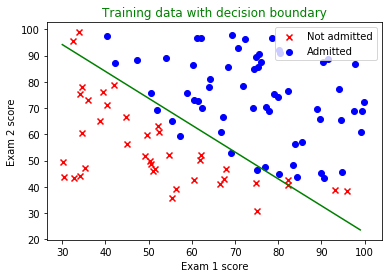

In [8]:
# 可视化决策边界
# theta_0 + theta_1 * x1 + theta_2 * x2 = 0
data = np.loadtxt('data/ex2data1.txt', delimiter=',')
X = data[:, :-1]
y = data[:, -1:]

not_admitted_index = np.where(y.ravel()==0)
admitted_index = np.where(y.ravel()==1)

plt.scatter(X[not_admitted_index, 0], X[not_admitted_index, 1], marker='x', color='r', label='Not admitted')
plt.scatter(X[admitted_index, 0], X[admitted_index, 1], marker='o', color='b', label='Admitted')

x1 = np.arange(30, 100, 1)
x2 = -1 * (optimize_theta[0] + optimize_theta[1] * x1) / optimize_theta[2]
plt.plot(x1, x2, color='g')

plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.title('Training data with decision boundary', color='g')
plt.legend(loc = 'upper right')
plt.show()

In [9]:
# 预测函数
def predict(theta, X):
    prob_val = h(theta, X)
    return prob_val, np.where(prob_val>=0.5, 1., 0.)

prob_val, predict_val = predict(optimize_theta.T, np.array([1, 45, 85]))
print('For a student with scores 45 and 85, we predict an admission probability of %f' % prob_val)
print('Expected value: 0.775 +/- 0.002\n')

data = np.loadtxt('data/ex2data1.txt', delimiter=',')
X = data[:, :-1]
X = np.insert(X, 0, 1, axis=1)
prob_val, predict_val = predict(optimize_theta.T, X)
print('Train Accuracy: %f' % (np.mean(predict_val == y.ravel()) * 100))
print('Expected accuracy (approx): 89.0\n')

For a student with scores 45 and 85, we predict an admission probability of 0.776293
Expected value: 0.775 +/- 0.002

Train Accuracy: 89.000000
Expected accuracy (approx): 89.0

